In [3]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load('E_field_data_combined_extended.npz' , allow_pickle=True)
# print(loaded_data)
E_data_combined = loaded_data['data']
sol =[]

for j in {0,30,60,90}:
    for k in range(-6,7):
        for l in {-1,1}:
            for i in E_data_combined:
                if(i[0] == j and i[1] == k and i[2]==l):
                    sol.append(i);
            print(len(sol))

# print(sol)

86
172
258
344
430
516
602
688
774
860
946
1032
1118
1204
1290
1376
1462
1548
1634
1720
1806
1892
1978
2064
2150
2236
2322
2408
2494
2580
2666
2752
2838
2924
3010
3096
3182
3268
3354
3440
3526
3612
3698
3784
3870
3956
4042
4128
4214
4300
4386
4472
4558
4644
4730
4816
4902
4988
5074
5160
5246
5332
5418
5504
5590
5676
5762
5848
5934
6020
6106
6192
6278
6364
6450
6536
6622
6708
6794
6880
6966
7052
7138
7224
7310
7396
7482
7568
7654
7740
7826
7912
7998
8084
8170
8256
8342
8428
8514
8600
8686
8772
8858
8944


In [4]:
sol = np.array(sol)
print(E_data_combined.shape)
print(sol.shape)

(8944, 5)
(8944, 5)


this is Update version with sol

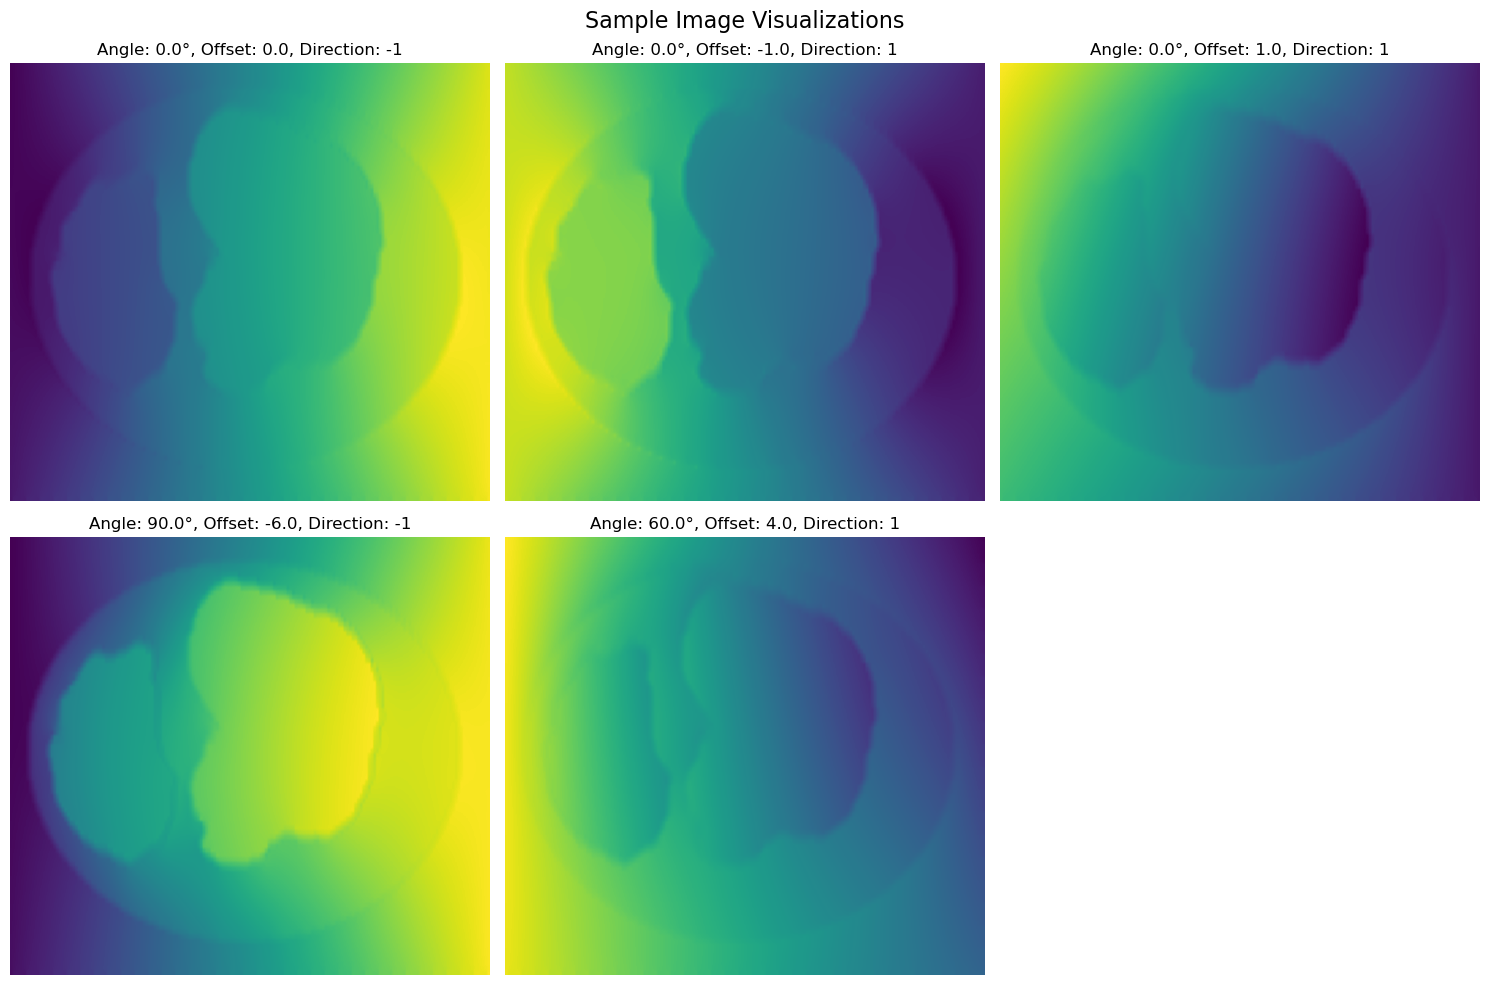

/tmp/ipykernel_2985262/1901550776.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata_df["Angle"], palette="Blues")
/tmp/ipykernel_2985262/1901550776.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata_df["Direction"], palette="Oranges")


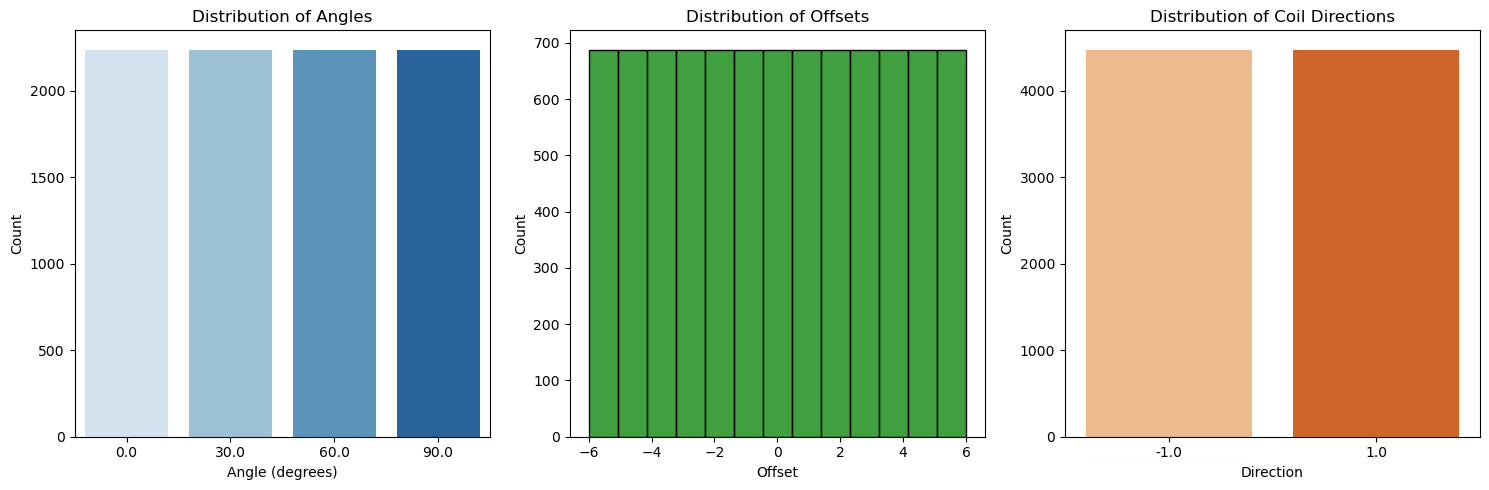

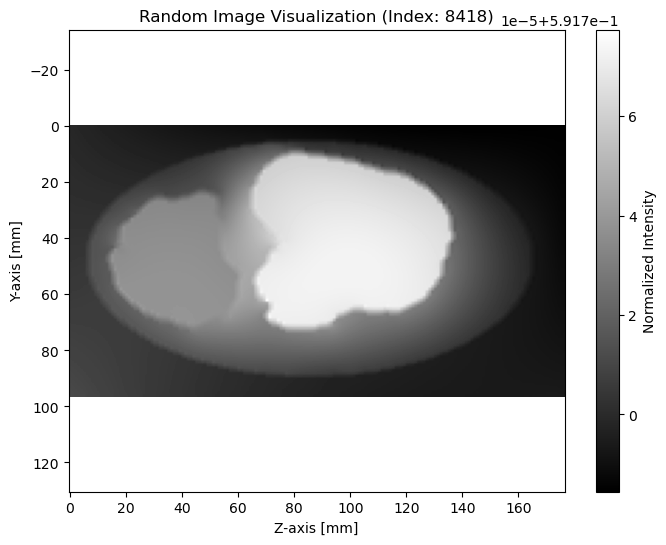

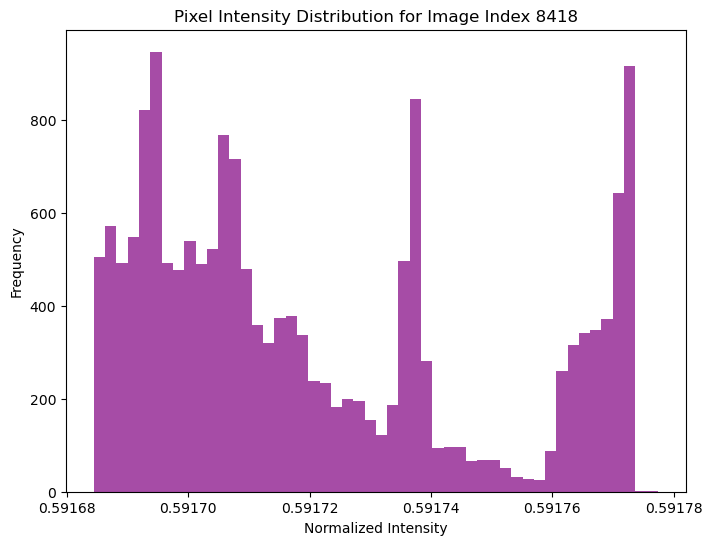

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
loaded_data = np.load("E_field_data_combined_extended.npz", allow_pickle=True)
sol = loaded_data["data"]
conditions = sol[:, :-1].astype(np.float32)  # Convert feature data to float32
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])  # Convert matrices

y_train = matrices[:, 2:99, 2:179]
y_train_min = y_train.min()
y_train_max = y_train.max()
y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)

# Visualize multiple sample images
num_samples_to_plot = 5  # Number of images to display
random_indices = np.random.choice(y_train_normalized.shape[0], num_samples_to_plot, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(y_train_normalized[idx], cmap="viridis", aspect="auto")
    angle, offset, direction = conditions[idx][:3]
    plt.title(f"Angle: {angle}°, Offset: {offset}, Direction: {int(direction)}")
    plt.axis("off")
plt.suptitle("Sample Image Visualizations", fontsize=16)
plt.tight_layout()
plt.show()
import seaborn as sns
import pandas as pd

# Create a DataFrame for the metadata
metadata_df = pd.DataFrame(conditions, columns=["Angle", "Offset", "Direction", "Slice Index"])

# Visualize Angle Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=metadata_df["Angle"], palette="Blues")
plt.title("Distribution of Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Count")

# Visualize Offset Distribution
plt.subplot(1, 3, 2)
sns.histplot(metadata_df["Offset"], kde=False, bins=13, color="green")
plt.title("Distribution of Offsets")
plt.xlabel("Offset")
plt.ylabel("Count")

# Visualize Direction Distribution
plt.subplot(1, 3, 3)
sns.countplot(x=metadata_df["Direction"], palette="Oranges")
plt.title("Distribution of Coil Directions")
plt.xlabel("Direction")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Plot the intensity distribution of one random image
selected_index = np.random.randint(0, y_train_normalized.shape[0])
selected_image = y_train_normalized[selected_index]
plt.figure(figsize=(8, 6))
plt.imshow(selected_image, cmap="gray")
plt.colorbar(label="Normalized Intensity")
plt.title(f"Random Image Visualization (Index: {selected_index})")
plt.xlabel("Z-axis [mm]")
plt.ylabel("Y-axis [mm]")
plt.axis("equal")
plt.show()

# Histogram of pixel intensity for the selected image
plt.figure(figsize=(8, 6))
plt.hist(selected_image.flatten(), bins=50, color="purple", alpha=0.7)
plt.title(f"Pixel Intensity Distribution for Image Index {selected_index}")
plt.xlabel("Normalized Intensity")
plt.ylabel("Frequency")
plt.show()


This is with cluster not sufling and no of cluster 104

1.0
0.0
Normalized Training Set X Shape: (6708, 4) X dtype: float32
Normalized Training Set y Shape: (6708, 97, 177) y dtype: float32
Normalized Validation Set X Shape: (1341, 4) X dtype: float32
Normalized Validation Set y Shape: (1341, 97, 177) y dtype: float32
Normalized Test Set X Shape: (895, 4) X dtype: float32
Normalized Test Set y Shape: (895, 97, 177) y dtype: float32
(17169,)
(97, 177)


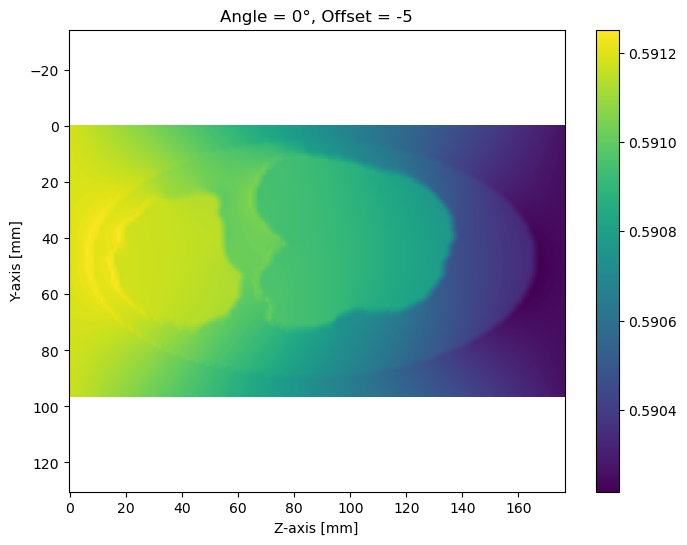

In [7]:
import numpy as np
sol = loaded_data["data"]
conditions = sol[:, :-1].astype(np.float32)  # Convert feature data to float32
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])  # Convert matrices
X_normalized = conditions
num_samples = X_normalized.shape[0]
indices = np.random.permutation(num_samples)  # Shuffle the indices
X_normalized_shuffled = X_normalized[indices]
y_normalized_shuffled = matrices[indices]
train_size = int(0.75 * num_samples)
val_size = int(0.15 * num_samples)
test_size = num_samples - train_size - val_size  # Ensure all data is used
X_train_1, y_train_1 = X_normalized_shuffled[:train_size], y_normalized_shuffled[:train_size]
X_val_1, y_val_1 = X_normalized_shuffled[train_size:train_size + val_size], y_normalized_shuffled[train_size:train_size + val_size]
X_test_1, y_test_1 = X_normalized_shuffled[train_size + val_size:], y_normalized_shuffled[train_size + val_size:]
y_train_1 = y_train_1[:, 2:99, 2:179]
y_val_1 = y_val_1[:, 2:99, 2:179]
y_test_1 = y_test_1[:, 2:99, 2:179]
mini_train = y_train_1.min()
maxi_train = y_train_1.max()

mini_val = y_val_1.min()
maxi_val = y_val_1.max()

mini_test = y_test_1.min()
maxi_test = y_test_1.max()

y_train_1 = (y_train_1 - mini_train) / (maxi_train- mini_train)
y_val_1 = (y_val_1 - mini_val) / (maxi_val- mini_val)
y_test_1 = (y_test_1 - mini_test) / (maxi_test - mini_test)
print(y_train_1.max())
print(y_train_1.min())
print("Normalized Training Set X Shape:", X_train_1.shape, "X dtype:", X_train_1.dtype)
print("Normalized Training Set y Shape:", y_train_1.shape, "y dtype:", y_train_1.dtype)
print("Normalized Validation Set X Shape:", X_val_1.shape, "X dtype:", X_val_1.dtype)
print("Normalized Validation Set y Shape:", y_val_1.shape, "y dtype:", y_val_1.dtype)
print("Normalized Test Set X Shape:", X_test_1.shape, "X dtype:", X_test_1.dtype)
print("Normalized Test Set y Shape:", y_test_1.shape, "y dtype:", y_test_1.dtype)
a_check = y_test_1[0].flatten()
print(a_check.shape)
a_check = a_check.reshape(97, 177)
print(a_check.shape)
selected_index = 89
angle, offset, direction, _, Ex_data = sol[selected_index]
plt.figure(figsize=(8, 6))
img = plt.imshow(a_check, cmap="viridis", aspect="auto")
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')
plt.colorbar(img) 
plt.show()


In [8]:
print(mini_train)
print(maxi_train)
print(mini_test)
print(maxi_test)
print(mini_val)
print(maxi_val)

-0.94585675
0.6591242
-0.93764555
0.64855015
-0.9574031
0.64943165


Train Ranges: [ 70  78  88  26  12  51  39  45  43   0   5  85  52  90  49 103  47  48
  29  36  96  40  15 102  27   1  86  32  54  71  56  34  92  62  55  13
  53  18  63 100  75  97  41 101  66   7  93  11  81   3  17  65  83  79
   6  58  25  14  30  59  89  44   4  64  76   9  80  33  22  35  50  68]
Validation Ranges: [23  8 98 74 24 46  2 82 67 21 42]
Test Ranges: [60 37 38 99 57 73 28 20 94 91 19 69 31 77 95 84 87 10 61 16 72]

Train Indices: [6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6708, 6709, 6710, 6711, 6712


Shapes of Data:
X_train_1 shape: (6192, 4) | y_train_1 shape: (6192, 97, 177)
X_val_1 shape: (946, 4) | y_val_1 shape: (946, 97, 177)
X_test_1 shape: (1806, 4) | y_test_1 shape: (1806, 97, 177)

Global Min (y_train_1): -0.9574031
Global Max (y_train_1): 0.6591242

After Normalization:
y_train_1 min: 0.5966777 | max: 1.2108692
y_val_1 min: 0.59225917 | max: 1.2057666
y_test_1 min: 0.59981996 | max: 1.2068228


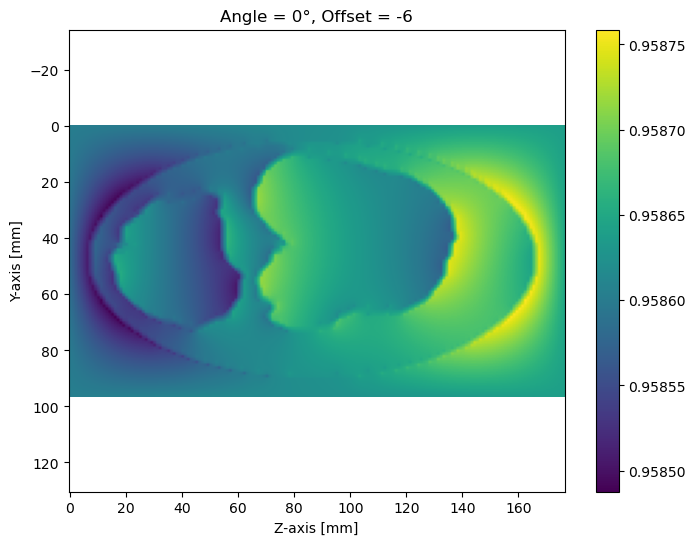

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of samples and ranges
total_samples = 8944
samples_per_range = 86
num_ranges = total_samples // samples_per_range

# Create ranges
all_ranges = np.arange(num_ranges)
np.random.shuffle(all_ranges)  
train_ranges = all_ranges[:int(0.7 * num_ranges)]
val_ranges = all_ranges[int(0.7 * num_ranges):int(0.8 * num_ranges)]
test_ranges = all_ranges[int(0.8 * num_ranges): int(1.0 * num_ranges)] 

print("Train Ranges:", train_ranges)
print("Validation Ranges:", val_ranges)
print("Test Ranges:", test_ranges)

# Helper function to get indices for each set
def get_indices_from_ranges(ranges, samples_per_range, shuffle=True):
    indices = []
    for r in ranges:
        start = r * samples_per_range
        end = start + samples_per_range
        indices.extend(range(start, end))
    if shuffle:
        np.random.shuffle(indices)
    return indices

# Get indices for train, val, and test sets
train_indices = get_indices_from_ranges(train_ranges, samples_per_range, shuffle=False)
val_indices = get_indices_from_ranges(val_ranges, samples_per_range, shuffle=False)
test_indices = get_indices_from_ranges(test_ranges, samples_per_range, shuffle=False)  # No shuffle

print("\nTrain Indices:", train_indices)
print("Validation Indices:", val_indices)
print("Test Indices:", test_indices)

# Assign data based on indices
X_train_1, y_train_1 = conditions[train_indices], y_train_normalized[train_indices]
X_val_1, y_val_1 = conditions[val_indices], y_train_normalized[val_indices]
X_test_1, y_test_1 = conditions[test_indices], y_train_normalized[test_indices]
# Print shapes of datasets
print("\nShapes of Data:")
print("X_train_1 shape:", X_train_1.shape, "| y_train_1 shape:", y_train_1.shape)
print("X_val_1 shape:", X_val_1.shape, "| y_val_1 shape:", y_val_1.shape)
print("X_test_1 shape:", X_test_1.shape, "| y_test_1 shape:", y_test_1.shape)

# Normalize the datasets
print("\nGlobal Min (y_train_1):", y_train_min)
print("Global Max (y_train_1):", y_train_max)

# Normalize all datasets using training set's global min and max
y_train_1 = (y_train_1 - y_train_min) / (y_train_max - y_train_min)
y_val_1 = (y_val_1 - y_train_min) / (y_train_max - y_train_min)
y_test_1 = (y_test_1 - y_train_min) / (y_train_max - y_train_min)

# Verify normalization
print("\nAfter Normalization:")
print("y_train_1 min:", y_train_1.min(), "| max:", y_train_1.max())
print("y_val_1 min:", y_val_1.min(), "| max:", y_val_1.max())
print("y_test_1 min:", y_test_1.min(), "| max:", y_test_1.max())

# Visualization
selected_index = 84  # Example index for visualization
angle, offset, direction, _, Ex_data = sol[selected_index]
a_check = y_test_1[0].flatten().reshape(97, 177)

plt.figure(figsize=(8, 6))
img = plt.imshow(a_check, cmap="viridis", aspect="auto")
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')
plt.colorbar(img)
plt.show()


## Now , we are update the code and use the the check point and droupout and earily stopping  

plot the best_model.h5 

this is when we have use the global min and max 

Model: "fcn_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 4)]               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 40        
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 32)                288       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               4224      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 128)               0  

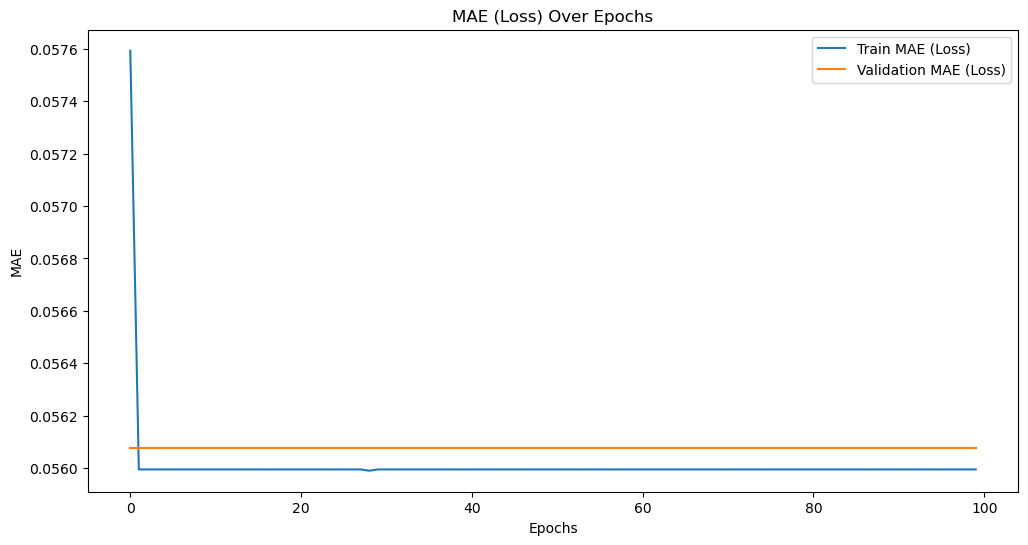

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.regularizers import l2

# # Function to print the shape of the tensor at each stage (for debugging)
# def print_shape(x):
#     print('Current layer shape:', x.shape)
#     return x

# # Model Architecture
# def model_architecture():
#     alpha = 0.0  # Leaky ReLU parameter

#     def dense_block(input, num_units):
#         x = Dense(num_units)(input)
#         x = LeakyReLU(alpha=alpha)(x)
#         return x

#     inputs = Input(shape=(4,), name='data')

#     x = dense_block(inputs, 8)
#     x = dense_block(x, 32)
#     x = dense_block(x, 128)
#     x = dense_block(x, 512)
#     x = dense_block(x, 2048)
#     x = dense_block(x, 8192)
#     x = Dense(97 * 177, activation='sigmoid')(x)

#     outputs = Reshape((97, 177, 1))(x)

#     model = Model(inputs, outputs, name="fcn_conv")

#     model.summary()
#     return model

# # Build the model
# model = model_architecture()
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# # Reshape labels to match the output of the model
# y_train_reshaped = np.expand_dims(y_train_1, axis=-1)
# y_val_reshaped = np.expand_dims(y_val_1, axis=-1)

# # Define callbacks for training
# checkpoint = ModelCheckpoint('best_model_upsampling_update_1.keras', monitor='val_loss', save_best_only=True, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, verbose=1)

# # Train the model
# history = model.fit(
#     X_train_1, y_train_reshaped,
#     validation_data=(X_val_1, y_val_reshaped),
#     epochs=100, batch_size=16, verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# # Function to plot training history
# def plot_history(history):
#     plt.figure(figsize=(12, 6))
#     plt.plot(history.history['loss'], label='Train MAE (Loss)')
#     plt.plot(history.history['val_loss'], label='Validation MAE (Loss)')
#     plt.title('MAE (Loss) Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('MAE')
#     plt.legend()
#     plt.show()

# # Plotting the training history
# plot_history(history)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_upsampling_update_1.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


57/57 [==============================] - 0s 3ms/step
Test MAE (using per-sample mean absolute error): 0.059687987
Variance of MAE across samples: 0.0021141446


: 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Reshape
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.regularizers import l2

# # Function to print the shape of the tensor at each stage (for debugging)
# def print_shape(x):
#     print('Current layer shape:', x.shape)
#     return x

# # Model Architecture
# def model_architecture():
#     alpha = 0.0  # Leaky ReLU parameter

#     def dense_block(input, num_units):
#         x = Dense(num_units)(input)
#         x = LeakyReLU(alpha=alpha)(x)
#         return x

#     inputs = Input(shape=(4,), name='data')

#     x = dense_block(inputs, 8)
#     x = dense_block(x, 32)
#     x = dense_block(x, 128)
#     x = dense_block(x, 512)
#     x = dense_block(x, 2048)
#     x = dense_block(x, 8192)
#     x = Dense(97 * 177, activation='sigmoid')(x)

#     outputs = Reshape((97, 177, 1))(x)

#     model = Model(inputs, outputs, name="fcn_conv")

#     model.summary()
#     return model

# # Build the model
# model = model_architecture()
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# # Reshape labels to match the output of the model
# y_train_reshaped = np.expand_dims(y_train_1, axis=-1)
# y_val_reshaped = np.expand_dims(y_val_1, axis=-1)

# # Define callbacks for training
# checkpoint = ModelCheckpoint('best_model_upsampling_update_1.keras', monitor='val_loss', save_best_only=True, verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, verbose=1)

# # Train the model
# history = model.fit(
#     X_train_1, y_train_reshaped,
#     validation_data=(X_val_1, y_val_reshaped),
#     epochs=100, batch_size=16, verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# # Function to plot training history
# def plot_history(history):
#     plt.figure(figsize=(12, 6))
#     plt.plot(history.history['loss'], label='Train MAE (Loss)')
#     plt.plot(history.history['val_loss'], label='Validation MAE (Loss)')
#     plt.title('MAE (Loss) Over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('MAE')
#     plt.legend()
#     plt.show()

# # Plotting the training history
# plot_history(history)


In [ ]:
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load the trained model
# model = load_model('best_model_upsampling_update_1.h5')

# # Make predictions
# y_pred_best_model = model.predict(X_test_1)

# # Ensure both y_test_1 and y_pred_best_model have the same shape
# y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# # Calculate MAE for each sample and its variance
# err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
# test_mae = np.mean(err)
# test_variance = np.var(err)

# # Print the results
# print("Test MAE (using per-sample mean absolute error):", test_mae)
# print("Variance of MAE across samples:", test_variance)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display test intervals and allow user to select interval and x-offset
def select_interval_and_offset(y_test, y_pred, samples_per_range=86):
    # Display all test intervals
    total_samples = len(y_test)
    num_intervals = total_samples // samples_per_range
    print("Available Test Intervals (Index Range):")
    test_intervals = [(i * samples_per_range, (i + 1) * samples_per_range - 1) for i in range(num_intervals)]
    for i, (start, end) in enumerate(test_intervals):
        print(f"{i + 1}: {start} - {end}")
    while True:
        try:
            interval_choice = int(input(f"Enter the interval number (1-{num_intervals}): "))
            if 1 <= interval_choice <= num_intervals:
                selected_interval = test_intervals[interval_choice - 1]
                break
            else:
                print(f"Please choose a valid interval number between 1 and {num_intervals}.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
    
    start_index = selected_interval[0]
    print(f"Selected Interval: {selected_interval}")
    while True:
        try:
            x_offset = int(input(f"Enter an x-offset (0-{samples_per_range - 1}): "))
            if 0 <= x_offset < samples_per_range:
                selected_index = start_index + x_offset
                break
            else:
                print(f"Please choose a valid x-offset between 0 and {samples_per_range - 1}.")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    
    print(f"Selected Index: {selected_index} (Start Index: {start_index} + X-Offset: {x_offset})")
    y_test_selected = y_test[selected_index, ...]
    y_pred_selected = y_pred[selected_index, ...]
    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(12, 5))
    for idx, ax in enumerate(axs.flat):
        if idx == 0:
            vec = y_test_selected
            ax.set_title(f'Actual Data for Test Sample {selected_index}\nInterval: {selected_interval}, X-Offset: {x_offset}')
        elif idx == 1:
            vec = y_pred_selected
            ax.set_title(f'Predicted Data for Test Sample {selected_index}\nInterval: {selected_interval}, X-Offset: {x_offset}')
        im = ax.imshow(vec, aspect='auto', cmap='viridis', interpolation="nearest")
        fig.colorbar(im, ax=ax, orientation="vertical", shrink=0.99, aspect=40, pad=0.01)
        ax.set_xlabel('Z-axis [mm]')
        ax.set_ylabel('Y-axis [mm]')
    plt.show()

select_interval_and_offset(y_test_1, y_pred_best_model)


Available Test Intervals (Index Range):
1: 0 - 85
2: 86 - 171
3: 172 - 257
4: 258 - 343
5: 344 - 429
6: 430 - 515
7: 516 - 601
8: 602 - 687
9: 688 - 773
10: 774 - 859
11: 860 - 945
12: 946 - 1031
13: 1032 - 1117
14: 1118 - 1203
15: 1204 - 1289
16: 1290 - 1375
17: 1376 - 1461
18: 1462 - 1547
19: 1548 - 1633
20: 1634 - 1719
21: 1720 - 1805


update on the test dataset 

In [ ]:
def optimize_dataset(X_data, y_data, samples_per_range=86):
    """
    Optimize both X and Y datasets by calculating differences for consecutive matrices.
    
    Parameters:
        X_data (numpy.ndarray): Feature dataset.
        y_data (numpy.ndarray): Label dataset.
        samples_per_range (int): Number of samples per interval.
    
    Returns:
        tuple: Optimized X, Y datasets and updated intervals.
    """
    n_samples = len(X_data)
    n_intervals = n_samples // samples_per_range
    opt_X, opt_y, updated_intervals = [], [], []

    for i in range(n_intervals):
        start, end = i * samples_per_range, (i + 1) * samples_per_range
        X_interval = X_data[start:end]
        y_interval = y_data[start:end]
        
        # Calculate differences between consecutive elements
        diff_X = np.diff(X_interval, axis=0)
        diff_y = np.diff(y_interval, axis=0)
        
        opt_X.append(diff_X)
        opt_y.append(diff_y)
        updated_intervals.append((start, start + len(diff_X) - 1))
        
        print(f"Interval {i + 1}: Start={start}, End={end - 1}, Removed={end - 1}")
        print(f"Updated Interval {i + 1}: Start={start}, End={start + len(diff_X) - 1}")

    # Combine the optimized data
    opt_X = np.vstack(opt_X)
    opt_y = np.vstack(opt_y)
    
    print(f"\nOriginal X Shape: {X_data.shape}, Optimized X Shape: {opt_X.shape}")
    print(f"Original Y Shape: {y_data.shape}, Optimized Y Shape: {opt_y.shape}")
    
    print("\nUpdated Intervals:")
    for i, (s, e) in enumerate(updated_intervals, 1):
        print(f"Interval {i}: Start={s}, End={e}")
        
    return opt_X, opt_y, updated_intervals

# Example usage
opt_X, opt_y, updated_intervals = optimize_dataset(X_train_1, y_test_1)
print(f"\nOptimized X Shape: {opt_X.shape}, Optimized Y Shape: {opt_y.shape}")
print(f"Updated Intervals: {updated_intervals}")


Interval 1: Start=0, End=85, Removed=85
Updated Interval 1: Start=0, End=84
Interval 2: Start=86, End=171, Removed=171
Updated Interval 2: Start=86, End=170
Interval 3: Start=172, End=257, Removed=257
Updated Interval 3: Start=172, End=256
Interval 4: Start=258, End=343, Removed=343
Updated Interval 4: Start=258, End=342
Interval 5: Start=344, End=429, Removed=429
Updated Interval 5: Start=344, End=428
Interval 6: Start=430, End=515, Removed=515
Updated Interval 6: Start=430, End=514
Interval 7: Start=516, End=601, Removed=601
Updated Interval 7: Start=516, End=600
Interval 8: Start=602, End=687, Removed=687
Updated Interval 8: Start=602, End=686
Interval 9: Start=688, End=773, Removed=773
Updated Interval 9: Start=688, End=772
Interval 10: Start=774, End=859, Removed=859
Updated Interval 10: Start=774, End=858
Interval 11: Start=860, End=945, Removed=945
Updated Interval 11: Start=860, End=944
Interval 12: Start=946, End=1031, Removed=1031
Updated Interval 12: Start=946, End=1030
Inte

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_upsampling_update_1.keras')

# Make predictions
y_pred_best_model = model.predict(opt_X)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(opt_y[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(opt_y.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)


192/192 [==============================] - 0s 2ms/step
Test MAE (using per-sample mean absolute error): 0.60125655
Variance of MAE across samples: 0.0023178514


Available Test Intervals (Index Range):
1: 0 - 84
2: 85 - 169
3: 170 - 254
4: 255 - 339
5: 340 - 424
6: 425 - 509
7: 510 - 594
8: 595 - 679
9: 680 - 764
10: 765 - 849
11: 850 - 934
12: 935 - 1019
13: 1020 - 1104
14: 1105 - 1189
15: 1190 - 1274
16: 1275 - 1359
17: 1360 - 1444
18: 1445 - 1529
19: 1530 - 1614
20: 1615 - 1699
21: 1700 - 1784
Selected Interval: (1615, 1699)
Selected Index: 1660 (Start Index: 1615 + X-Offset: 45)


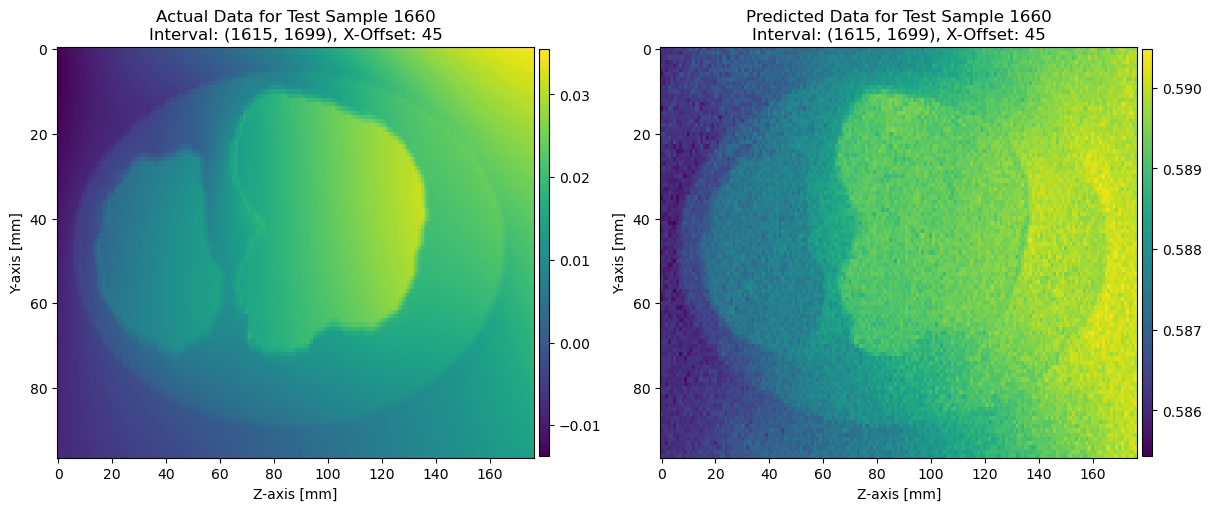

In [ ]:
select_interval_and_offset(opt_y, y_pred_best_model , samples_per_range=85)

## now , we makeing dataset with conactinate with desirable image 

In [ ]:
import numpy as np
loaded_nerve = np.load('nerve_2D_cross_section.npy')
loaded_nerve = loaded_nerve[2:99, 2:179]
print(loaded_nerve.min())
print(loaded_nerve.max())
print("Loaded nerve shape:", loaded_nerve.shape)

1.0
5.0
Loaded nerve shape: (97, 177)


In [ ]:
# for i in loaded_nerve:
#     print(i)
loaded_nerve_mini = loaded_nerve.min()
loaded_nerve_max = loaded_nerve.max()

loaded_nerve = (loaded_nerve - loaded_nerve_mini) / (loaded_nerve_max - loaded_nerve_mini)

print(loaded_nerve.min())
print(loaded_nerve.max())

0.0
1.0


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('best_model_upsampling_update_1.keras')
model.summary()
y_pred_best_model = model.predict(X_train_1)
x_val= model.predict(X_val_1)
x_test = model.predict(X_test_1)

print(y_pred_best_model.shape)
y_pred_flat = y_pred_best_model.reshape(6708,97,177)
x_val = x_val.reshape(1341,97,177)
x_test= x_test.reshape(895,97,177)
print(y_pred_flat.shape)


Model: "fcn_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 4)]               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 40        
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 32)                288       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               4224      
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 128)               0  

In [ ]:
import numpy as np
reshaped_matrices = y_pred_flat.reshape(y_pred_best_model.shape[0], -1)
is_identical = np.all(reshaped_matrices == reshaped_matrices[0], axis=1)
all_matrices_identical = np.all(is_identical)
print(f"Are all matrices inside `y_pred_best_model` identical? {all_matrices_identical}")
if not all_matrices_identical:
    differing_indices = np.where(is_identical == False)[0]
    print(f"Matrices at these indices differ: {differing_indices}")
if not all_matrices_identical:
    for index in differing_indices:
        print(f"Matrix {index} differs from the first matrix.")


Are all matrices inside `y_pred_best_model` identical? False
Matrices at these indices differ: [   1    2    3 ... 6705 6706 6707]
Matrix 1 differs from the first matrix.
Matrix 2 differs from the first matrix.
Matrix 3 differs from the first matrix.
Matrix 4 differs from the first matrix.
Matrix 5 differs from the first matrix.
Matrix 6 differs from the first matrix.
Matrix 7 differs from the first matrix.
Matrix 8 differs from the first matrix.
Matrix 9 differs from the first matrix.
Matrix 10 differs from the first matrix.
Matrix 11 differs from the first matrix.
Matrix 12 differs from the first matrix.
Matrix 13 differs from the first matrix.
Matrix 14 differs from the first matrix.
Matrix 15 differs from the first matrix.
Matrix 16 differs from the first matrix.
Matrix 17 differs from the first matrix.
Matrix 18 differs from the first matrix.
Matrix 19 differs from the first matrix.
Matrix 20 differs from the first matrix.
Matrix 21 differs from the first matrix.
Matrix 22 differs

In [ ]:
print(y_pred_flat.shape)

(6708, 97, 177)


In [ ]:
new_dataset = []
for pred in y_pred_flat:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_dataset.append(concatenated_image)
new_dataset = np.array(new_dataset)
np.save('new_image_dataset.npy', new_dataset)
print("New dataset shape:", new_dataset.shape)


New dataset shape: (6708, 97, 177, 2)


In [ ]:
new_val = []
for pred in x_val:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_val.append(concatenated_image)
new_val = np.array(new_val)
np.save('new_val_dataset.npy', new_val)
print("New dataset shape:", new_val.shape)


New dataset shape: (1341, 97, 177, 2)


In [ ]:
new_test = []
for pred in x_test:
    concatenated_image = np.stack((pred, loaded_nerve), axis=-1)
    new_test.append(concatenated_image)
new_test = np.array(new_test)
np.save('new_test_dataset.npy', new_test)
print("New dataset shape:", new_test.shape)


New dataset shape: (895, 97, 177, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, ZeroPadding2D
from tensorflow.keras.models import Model
import numpy as np

# Load the new dataset
new_dataset = np.load('new_image_dataset.npy')
print("New dataset shape:", new_dataset.shape)
X_train = new_dataset 
Y_train = y_train_1  
Y_train = np.expand_dims(Y_train, axis=-1)
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

New dataset shape: (6708, 97, 177, 2)
X_train shape: (6708, 97, 177, 2)
Y_train shape: (6708, 97, 177, 1)


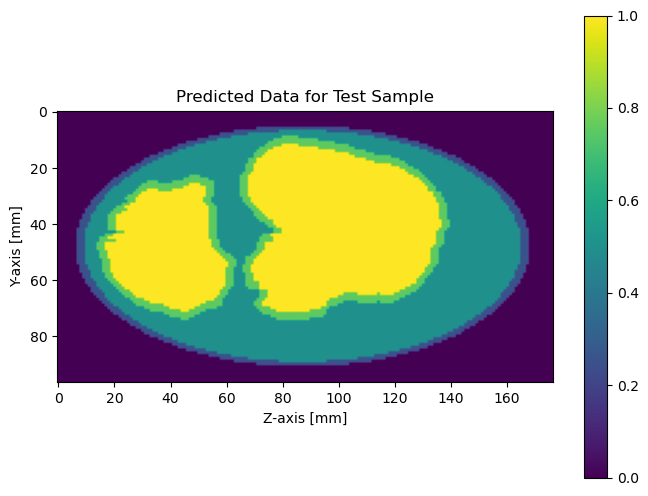

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
img_pred = plt.imshow(X_train[0,:,:,1], cmap='viridis')  # Plot predicted data slice
plt.title(f'Predicted Data for Test Sample')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.colorbar(img_pred)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
import numpy as np

# Load the new dataset
new_dataset = np.load('new_image_dataset.npy')
print("New dataset shape:", new_dataset.shape)
new_val= np.load('new_val_dataset.npy')
new_test = np.load('new_test_dataset.npy')

# Define input (X) and output (Y) from the dataset
X_train = new_dataset
Y_train = y_train_1
X_val = new_val
X_test = new_test
Y_val = y_val_1
Y_test = y_test_1
Y_train = np.expand_dims(Y_train, axis=-1)
Y_val = np.expand_dims(Y_val , axis=-1)
Y_test = np.expand_dims(Y_test , axis =-1)
print("Original X_train shape:", X_train.shape)
print("Original Y_train shape:", Y_train.shape)

# Resize X_train and Y_train to (96, 176)
X_train_resized = tf.image.resize(X_train, [96, 176]).numpy()
Y_train_resized = tf.image.resize(Y_train, [96, 176]).numpy()
X_val_resized = tf.image.resize(X_val, [96, 176]).numpy()
Y_val_resized = tf.image.resize(Y_val, [96, 176]).numpy()
X_test_resized = tf.image.resize(X_test, [96, 176]).numpy()
Y_test_resized = tf.image.resize(Y_test, [96, 176]).numpy()
print("Resized X_train shape:", X_train_resized.shape)
print("Resized Y_train shape:", Y_train_resized.shape)
print("Resized X_val shape:", X_val_resized.shape)
print("Resized Y_val shape:", Y_val_resized.shape)
print("Resized X_test shape:", X_test_resized.shape)
print("Resized Y_test shape:", Y_test_resized.shape)


New dataset shape: (6708, 97, 177, 2)
Original X_train shape: (6708, 97, 177, 2)
Original Y_train shape: (6708, 97, 177, 1)
Resized X_train shape: (6708, 96, 176, 2)
Resized Y_train shape: (6708, 96, 176, 1)
Resized X_val shape: (1341, 96, 176, 2)
Resized Y_val shape: (1341, 96, 176, 1)
Resized X_test shape: (895, 96, 176, 2)
Resized Y_test shape: (895, 96, 176, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_image_reconstruction(input_shape=(96, 176, 2)):
    inputs = layers.Input(input_shape)
    
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    
    # Decoder
    u5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    
    # Single channel output for reconstruction
    outputs = layers.Conv2D(1, (1, 1), activation='linear')(c7)  # Use 'linear' for reconstruction
    
    model = models.Model(inputs, outputs)
    return model


In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 176, 2)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_90 (Conv2D)             (None, 96, 176, 64)  1216        ['input_7[0][0]']                
                                                                                                  
 conv2d_91 (Conv2D)             (None, 96, 176, 64)  36928       ['conv2d_90[0][0]']              
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 48, 88, 64)  0           ['conv2d_91[0][0]']        

In [ ]:
print("X_train_resized shape:", X_train_resized.shape)  # Should be (num_samples, 96, 176, 2)
print("Y_train_resized shape:", Y_train_resized.shape)  # Should be (num_samples, 96, 176, 1)

X_train_resized = X_train_resized.astype('float32')
Y_train_resized = Y_train_resized.astype('float32')
X_val_resized = X_train_resized.astype('float32')
Y_val_resized = Y_train_resized.astype('float32')
X_test_resized = X_train_resized.astype('float32')
Y_test_resized = Y_train_resized.astype('float32')


X_train_resized shape: (6708, 96, 176, 2)
Y_train_resized shape: (6708, 96, 176, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = unet_image_reconstruction(input_shape=(96, 176, 2))
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='mean_squared_error', 
              metrics=['mae'])

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('unet_reconstruction_best_model.h5', save_best_only=True, verbose=1)
]

# Fit the model
history = model.fit(
    X_train_resized, Y_train_resized,
    batch_size=8,  # Reduce batch size
    epochs=25,
    validation_split=0.1,
    callbacks=callbacks
)
# Save the final model
model.save('unet_reconstruction_final_model.h5')

Epoch 1/25


2024-12-08 19:05:45.885743: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x93ced890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-08 19:05:45.885778: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2024-12-08 19:05:45.890017: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-08 19:05:45.952423: W tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:281] Couldn't read CUDA driver version.
2024-12-08 19:05:45.953134: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


755/755 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0227
Epoch 1: val_loss improved from inf to 0.00037, saving model to unet_reconstruction_best_model.h5
755/755 [==============================] - 14s 14ms/step - loss: 0.0039 - mae: 0.0227 - val_loss: 3.7137e-04 - val_mae: 0.0150
Epoch 2/25
753/755 [============================>.] - ETA: 0s - loss: 3.3356e-04 - mae: 0.0116
Epoch 2: val_loss improved from 0.00037 to 0.00026, saving model to unet_reconstruction_best_model.h5
755/755 [==============================] - 14s 18ms/step - loss: 3.3401e-04 - mae: 0.0116 - val_loss: 2.6217e-04 - val_mae: 0.0100
Epoch 3/25
755/755 [==============================] - ETA: 0s - loss: 3.1235e-04 - mae: 0.0111
Epoch 3: val_loss did not improve from 0.00026
755/755 [==============================] - 19s 25ms/step - loss: 3.1235e-04 - mae: 0.0111 - val_loss: 4.2073e-04 - val_mae: 0.0167
Epoch 4/25
755/755 [==============================] - ETA: 0s - loss: 3.0485e-04 - mae: 0.0107

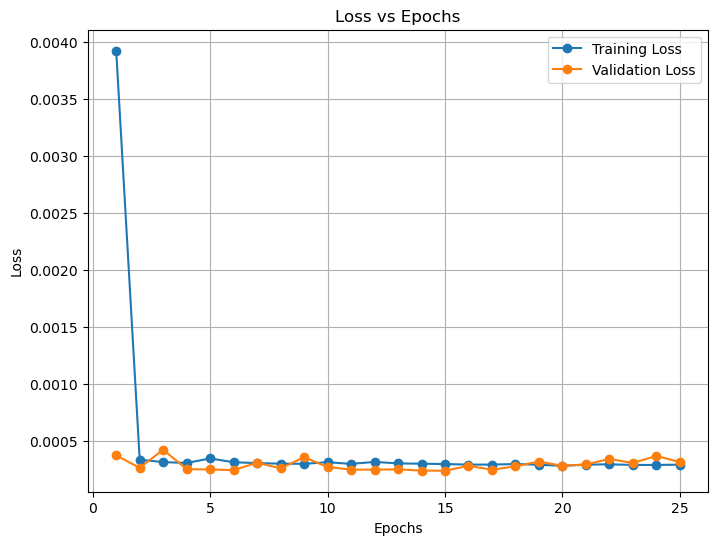

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


210/210 [==============================] - 3s 15ms/step
Test MAE (using per-sample mean absolute error): 0.008185801
Variance of MAE across samples: 0.00014155002


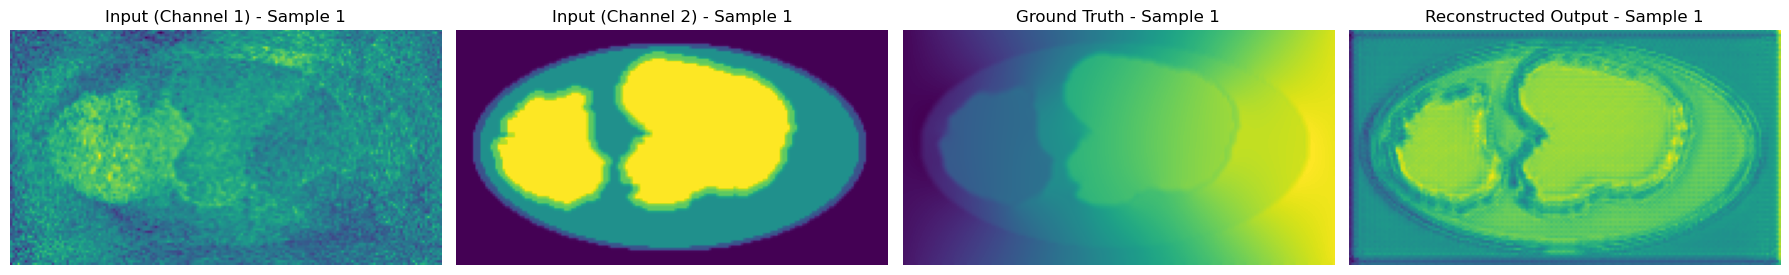

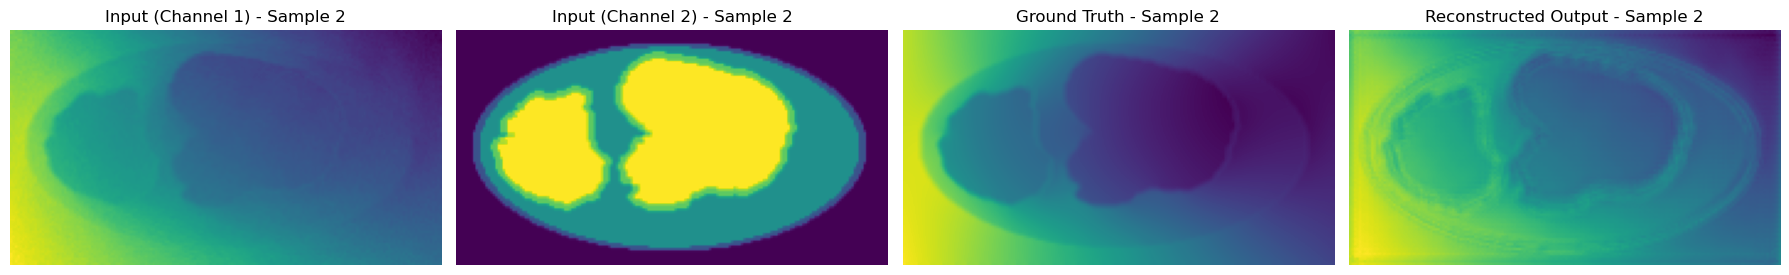

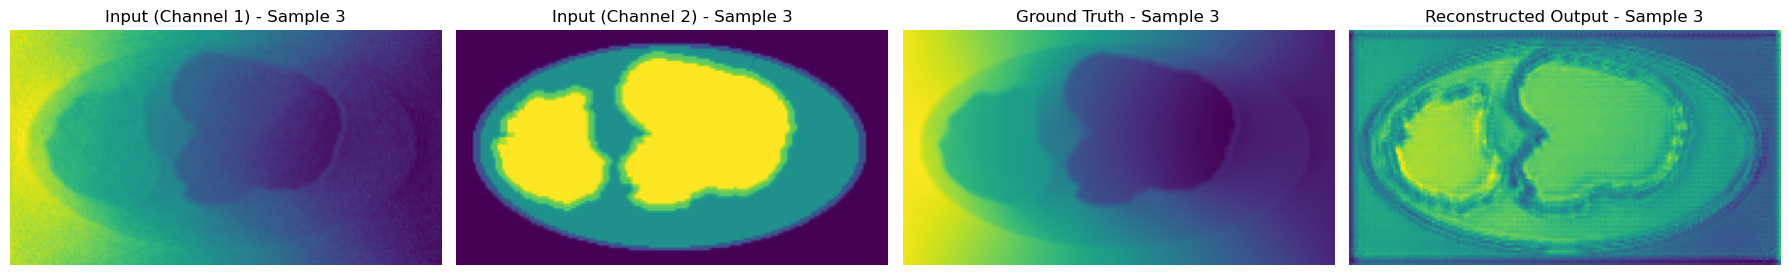

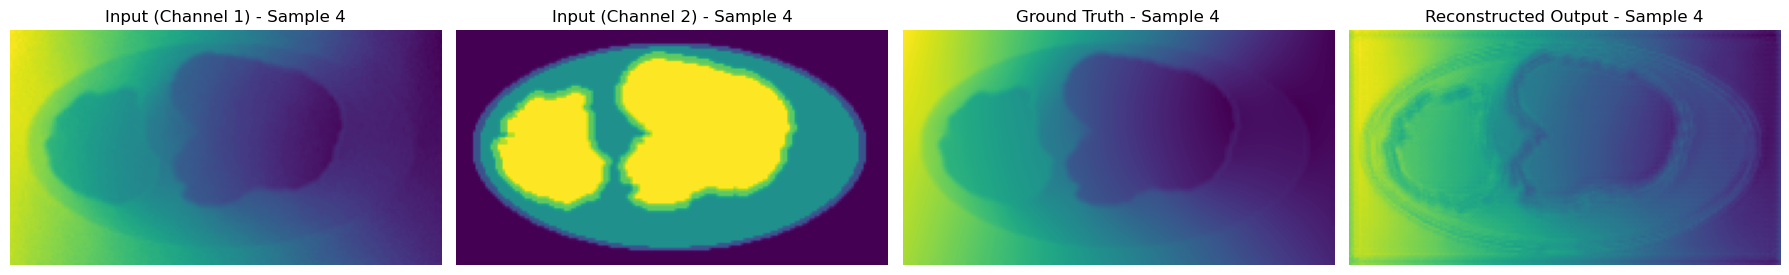

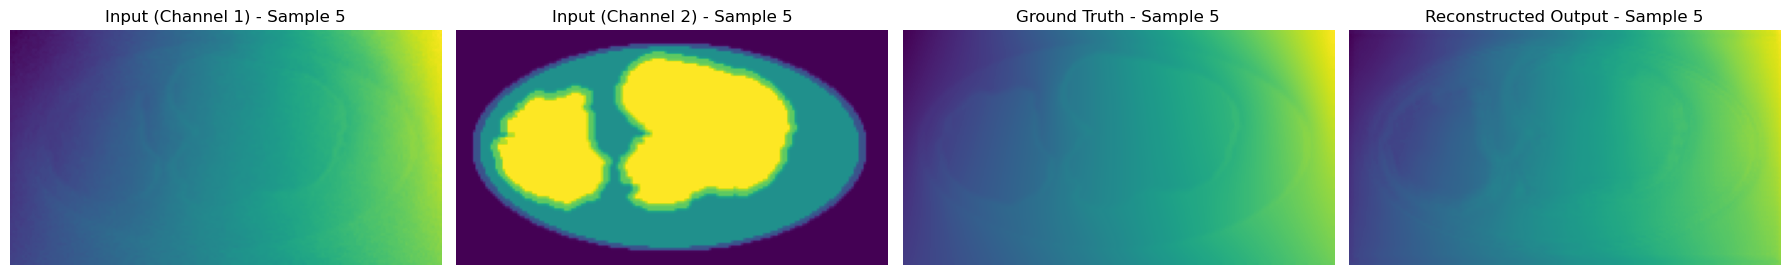

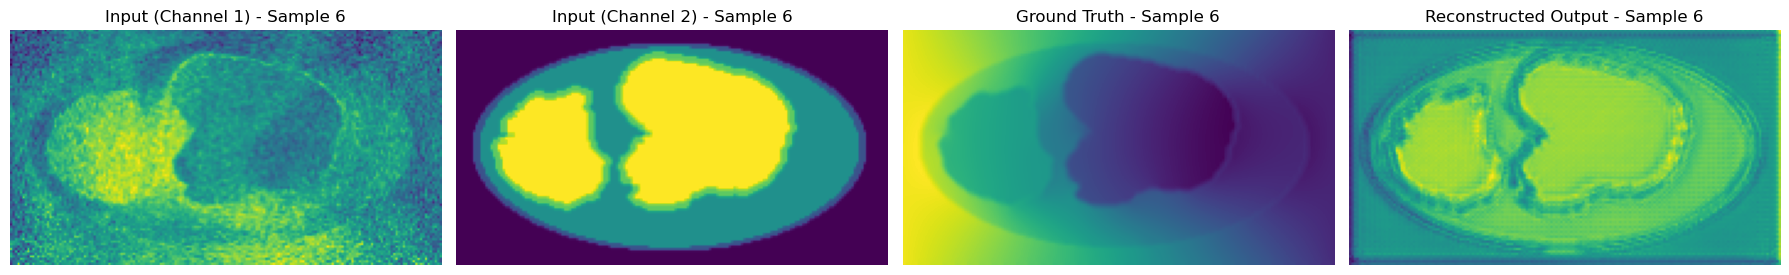

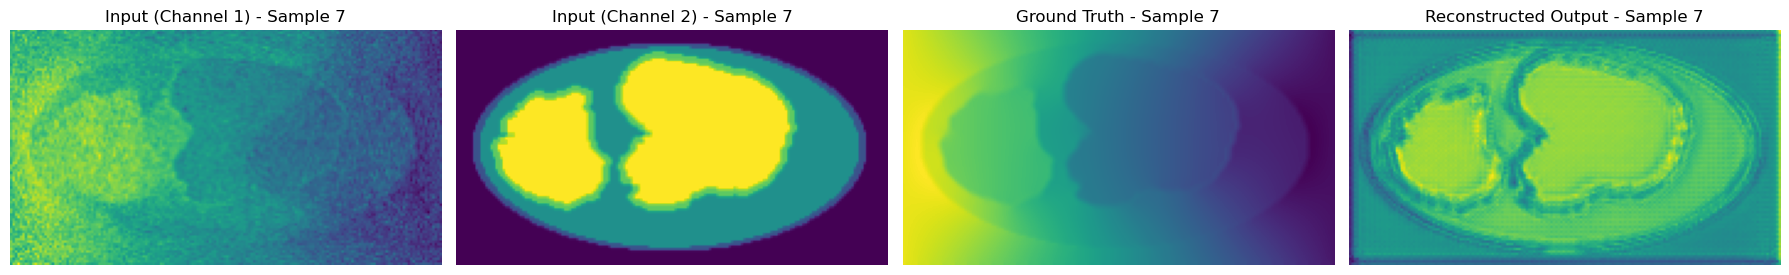

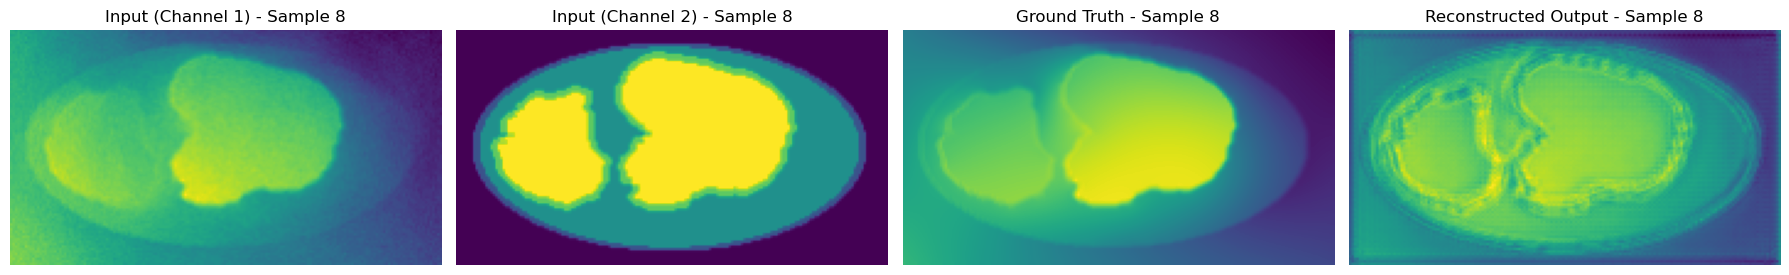

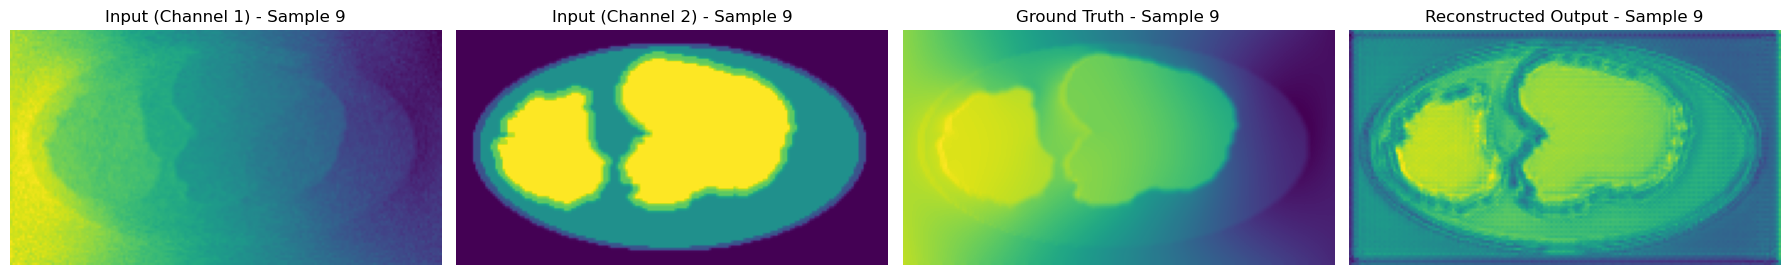

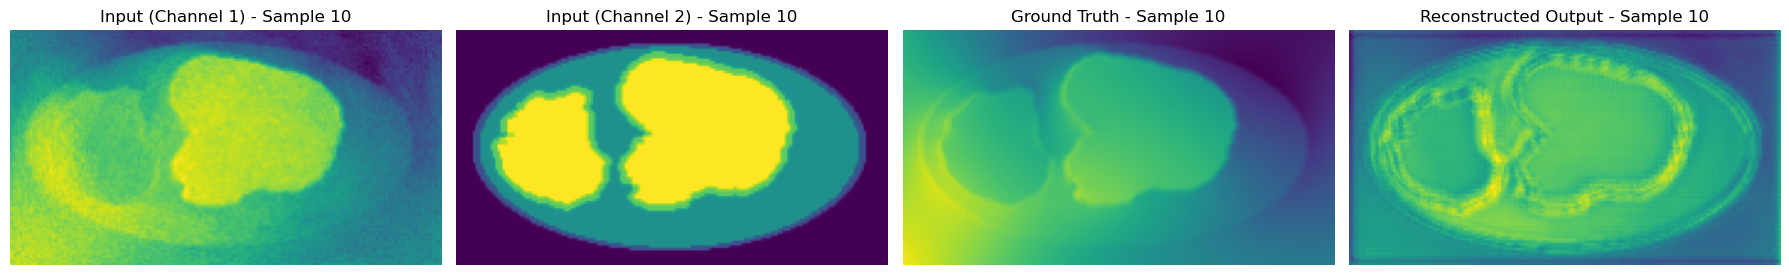

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('unet_reconstruction_final_model.h5')

# Predict on the test dataset
predicted_test = model.predict(X_test_resized)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(Y_test_resized[i, ...] - predicted_test[i, ...])) for i in range(Y_test_resized.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)

# Plot test samples with input, ground truth, and prediction
for i in range(10):  # Loop through the first 10 samples
    plt.figure(figsize=(18, 6))
    
    # Input (Channel 1)
    plt.subplot(1, 4, 1)
    plt.imshow(X_test_resized[i, :, :, 0], cmap='viridis')
    plt.title(f'Input (Channel 1) - Sample {i+1}')
    plt.axis('off')
    
    # Input (Channel 2)
    plt.subplot(1, 4, 2)
    plt.imshow(X_test_resized[i, :, :, 1], cmap='viridis')
    plt.title(f'Input (Channel 2) - Sample {i+1}')
    plt.axis('off')
    
    # Ground Truth
    plt.subplot(1, 4, 3)
    plt.imshow(Y_test_resized[i, :, :, 0], cmap='viridis')
    plt.title(f'Ground Truth - Sample {i+1}')
    plt.axis('off')
    
    # Predicted Output (Prediction)
    plt.subplot(1, 4, 4)
    plt.imshow(predicted_test[i, :, :, 0], cmap='viridis')
    plt.title(f'Reconstructed Output - Sample {i+1}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
